# Конвергентная валидность: международные гендерные индексы за 2020 год: ЦУР, ООН, ВЭФ

In [1]:
from randan.descriptive_statistics import ScaleStatistics # интервальная статистика
import pandas as pd # для обработки и анализа структурированных данных
import numpy as np# для корректной работы рандана 
from randan.bivariate_association import Correlation 

Массив данных находится в папке: https://disk.yandex.ru/d/PWOTilngObaAJg 

In [2]:
# загружаем таблицу
df = pd.read_excel('2020_reversed.xlsx')

In [3]:
# дескриптивная статистика
# от 144 до 180 стран в рейтингах
# df.describe()

In [4]:
# удаляем пробелы, остается 136 стран
df = df.dropna()
df

,Страна,Равные меры Индекс ЦУР,ВЭФ Индекс разрыва,ООН Индекс развития,ООН Индекс неравенства,Регион,Доход
1,Albania,0.741888,0.769,0.978,0.871,Европа и Северная Америка,Выше среднего
2,Algeria,0.643391,0.634,0.879,0.604,Ближний Восток и Северная Африка,Ниже среднего
4,Angola,0.491659,0.660,0.906,0.471,Африка к югу от Сахары,Ниже среднего
6,Argentina,0.745150,0.746,0.999,0.697,Латинская и Центральная Америка,Выше среднего
7,Armenia,0.743409,0.684,1.005,0.777,Европа и Северная Америка,Выше среднего
...,...,...,...,...,...,...,...
188,Venezuela,0.557818,0.713,1.001,0.478,Латинская и Центральная Америка,Ниже среднего
189,Viet Nam,0.693916,0.700,1.003,0.614,Азия и Тихоокеанский регион,Ниже среднего
190,Yemen,0.392804,0.494,0.464,0.213,Ближний Восток и Северная Африка,Низкий
191,Zambia,0.504408,0.731,0.945,0.478,Африка к югу от Сахары,Ниже среднего


In [5]:
# проверяем нормальность распределения по каждому рейтингу
# тест Колмогорова-Смирнова
# распределение не является нормальным
ss = ScaleStatistics(df, ['ООН Индекс неравенства'], show_results=False, normality_test=True, normality_test_type='ks') 
ss.summary() 


NORMALITY TESTS
------------------



,statistic,p-value
ООН Индекс неравенства,0.099,0.002


,N,mode,median,mean,25%,75%,interquart. range,interquart. range (norm.),min,max,range,std,var,entropy coef.,quality var.
ООН Индекс неравенства,136.0,0.392,0.657,0.681971,0.51425,0.872,0.35775,0.462209,0.213,0.987,0.774,0.198033,0.039217,0.992907,0.999324


In [6]:
# корреляционный анализ значений рейтинга по годам, метод Спирмена
corr = Correlation(df, method = 'spearman', two_tailed = True, n_decimals=3)


CORRELATION SUMMARY (SPEARMAN METHOD, 2-TAILED)
------------------
The following variables were removed from the analysis since they do not belong to numerical dtypes: Страна, Регион, Доход



Note: Each empty index duplicates the previous one.
Maximum correlation is 0.943 (p-value 0.0) for variables Равные меры Индекс ЦУР and ООН Индекс неравенства,
minimum correlation is 0.55 (p-value 0.0) for variables ВЭФ Индекс разрыва and ООН Индекс развития.


In [7]:
# приводим в табличный вид для приложения в диссертации 
# метод Спирмена, для сравнения с другими рейтингами
corr.correlation_matrix

Равные меры Индекс ЦУР  \
Равные меры Индекс ЦУР Coefficient            1.000000e+00   
                       p-value                         NaN   
                       N                      1.360000e+02   
ВЭФ Индекс разрыва     Coefficient            6.007581e-01   
                       p-value                1.061780e-14   
                       N                      1.360000e+02   
ООН Индекс развития    Coefficient            6.015428e-01   
                       p-value                9.605172e-15   
                       N                      1.360000e+02   
ООН Индекс неравенства Coefficient            9.427069e-01   
                       p-value                9.526439e-66   
                       N                      1.360000e+02   

                                    ВЭФ Индекс разрыва  ООН Индекс развития  \
Равные меры Индекс ЦУР Coefficient        6.007581e-01         6.015428e-01   
                       p-value            1.061780e-14         9.605172e-15   
                       N                  1.360000e+02         1.360000e+02   
ВЭФ Индекс разрыва     Coefficient        1.000000e+00         5.500904e-01   
                       p-value                     NaN         4.012202e-12   
                       N                  1.360000e+02         1.360000e+02   
ООН Индекс развития    Coefficient        5.500904e-01         1.000000e+00   
                       p-value            4.012202e-12                  NaN   
                       N                  1.360000e+02         1.360000e+02   
ООН Индекс неравенства Coefficient        5.514218e-01         5.622660e-01   
                       p-value            3.476363e-12         1.055973e-12   
                       N                  1.360000e+02         1.360000e+02   

                                    ООН Индекс неравенства  
Равные меры Индекс ЦУР Coefficient            9.427069e-01  
                       p-value                9.526439e-66  
                       N                      1.360000e+02  
ВЭФ Индекс разрыва     Coefficient            5.514218e-01  
                       p-value                3.476363e-12  
                       N                      1.360000e+02  
ООН Индекс развития    Coefficient            5.622660e-01  
                       p-value                1.055973e-12  
                       N                      1.360000e+02  
ООН Индекс неравенства Coefficient            1.000000e+00  
                       p-value                         NaN  
                       N                      1.360000e+02

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

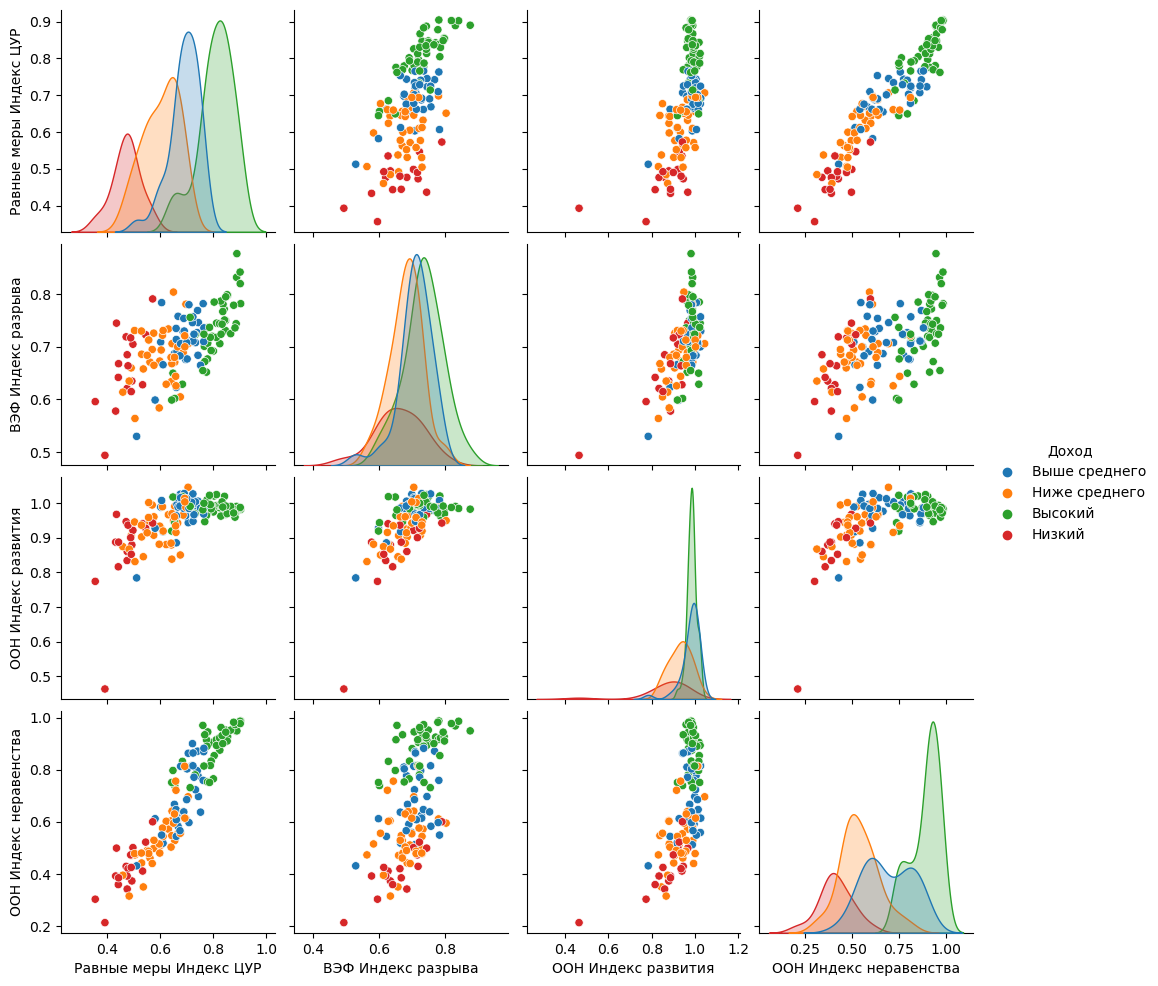

In [9]:
sns.pairplot(df, hue = 'Доход');

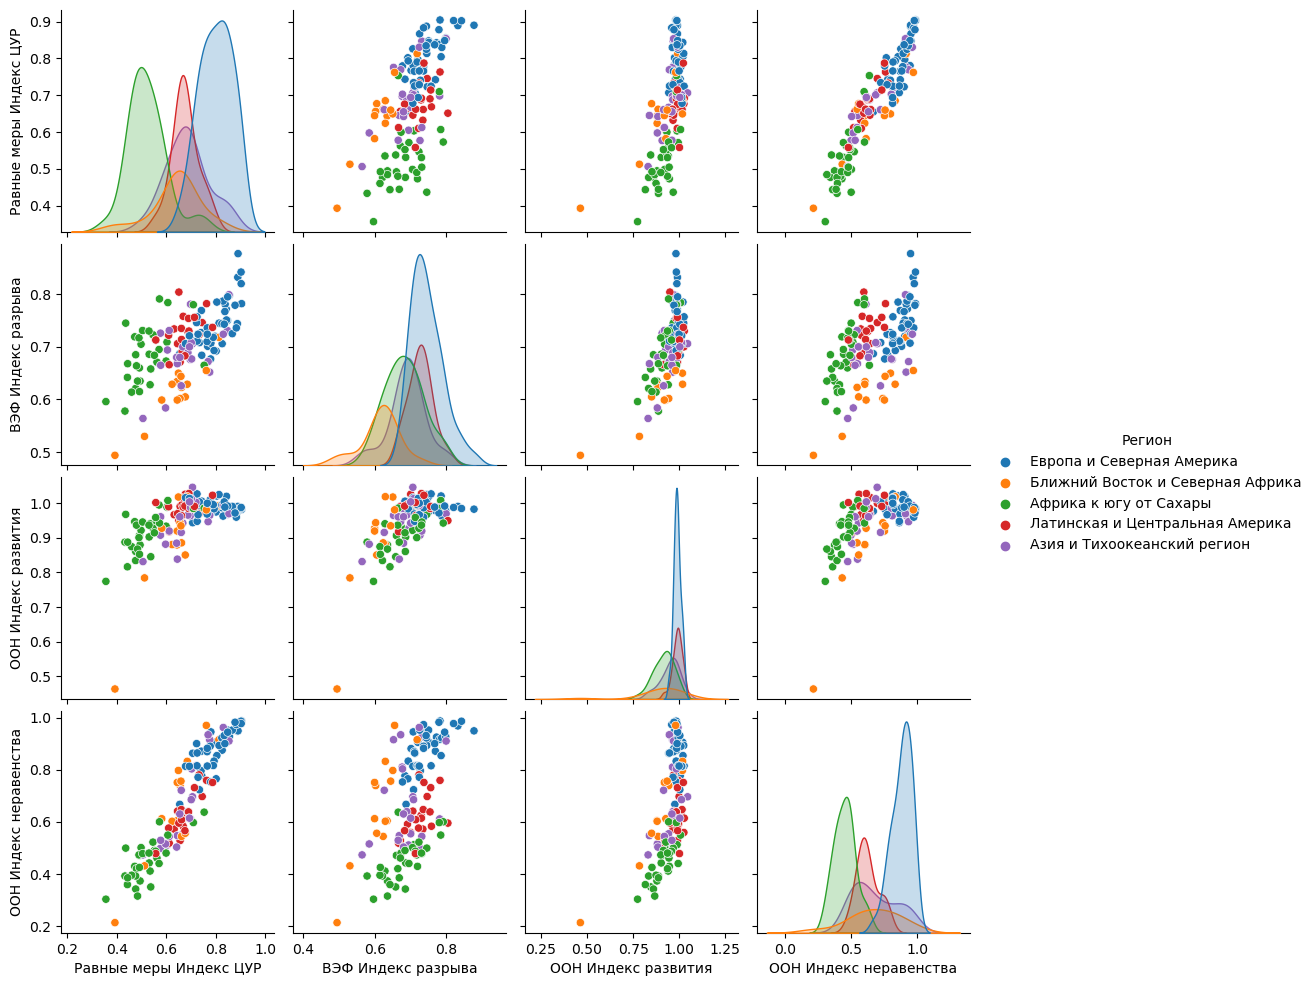

In [10]:
sns.pairplot(df, hue = 'Регион');

/var/folders/40/4tj44zl90rv_7zclngp8l_j00000gn/T/ipykernel_26947/3897674914.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/40/4tj44zl90rv_7zclngp8l_j00000gn/T/ipykernel_26947/3897674914.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(method = 'spearman'), square=False, cmap=v, mask=mask, annot=True);


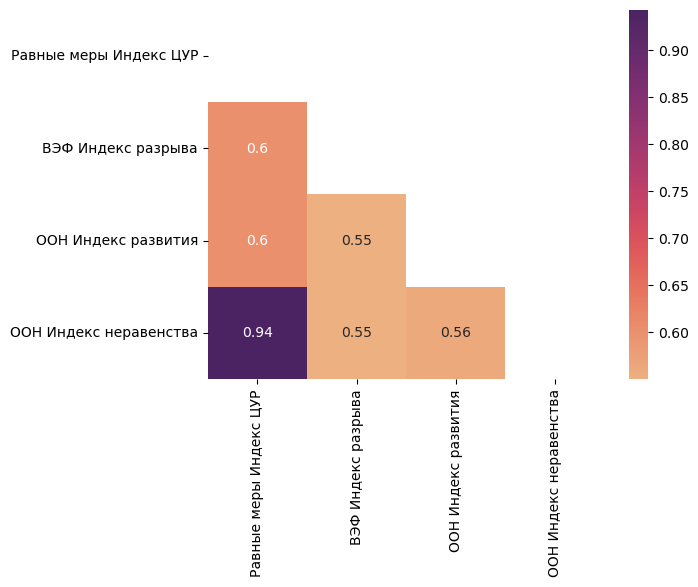

In [11]:
corr = df.corr()
v = sns.color_palette("flare", as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
# cmap = sns.diverging_palette(200, 20, as_cmap=True)
sns.heatmap(df.corr(method = 'spearman'), square=False, cmap=v, mask=mask, annot=True);